In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_house = pd.read_csv("final_q1_cleaned.csv")

In [3]:
df_house

,Unnamed: 0,Candidate,clean_name,State,District,num_candidates_in_race,Office Type,Race Type,Primary Status,Primary Runoff Status,...,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date,Republican?,Challenger?(else_open),received_endorsements?
0,0,Lizzetta Hill McConnell,lizzetta hill mcconnell,AL,U.S. House Alabama District 1,2,Representative,Regular,Lost,None,...,0.00,0.00,5127.00,6021.00,0.0,0.00,02/03/2018,False,True,False
1,1,Mallory Hagan,mallory hagan,AL,U.S. House Alabama District 3,2,Representative,Regular,Advanced,None,...,3935.43,27000.00,436373.83,406331.32,0.0,0.00,01/01/2018,False,True,False
2,2,Peter Joffrion,peter joffrion,AL,U.S. House Alabama District 5,1,Representative,Regular,Advanced,None,...,9670.30,5600.00,574696.15,566967.63,0.0,0.00,04/01/2017,False,True,False
3,3,Danner Kline,danner kline,AL,U.S. House Alabama District 6,1,Representative,Regular,Advanced,None,...,35.00,2305.67,287397.23,285091.56,0.0,2285.67,04/01/2017,False,True,False
4,4,Steve Smith,steve smith,AZ,U.S. House Arizona District 1,3,Representative,Regular,Lost,None,...,76150.00,0.00,362737.91,362551.54,0.0,0.00,05/15/2017,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,767,Shirley Love,shirley love,WV,U.S. House West Virginia District 3,11,Representative,Regular,Lost,None,...,0.00,0.00,4000.00,6947.00,0.0,0.00,01/18/2018,False,False,True
768,768,Nick Polce,nick polce,WI,U.S. House Wisconsin District 1,6,Representative,Regular,Lost,None,...,0.00,0.00,16823.00,20874.00,0.0,0.00,10/01/2017,True,False,False
769,769,Jeremy Ryan,jeremy ryan,WI,U.S. House Wisconsin District 1,6,Representative,Regular,Lost,None,...,0.00,0.00,0.00,0.00,0.0,0.00,NaN,True,False,False
770,770,Steve Toft,steve toft,WI,U.S. House Wisconsin District 3,1,Representative,Regular,Advanced,None,...,0.00,0.00,272317.76,304813.76,0.0,0.00,10/01/2017,True,True,True


In [4]:
df_house.dtypes

Unnamed: 0                                int64
Candidate                                object
clean_name                               object
State                                    object
District                                 object
num_candidates_in_race                    int64
Office Type                              object
Race Type                                object
Primary Status                           object
Primary Runoff Status                    object
General Status                           object
Primary %                               float64
Endorsements                            float64
district_identifier                      object
district_lean                           float64
Cand_Office                              object
Cand_Party_Affiliation                   object
Cand_Incumbent_Challenger_Open_Seat      object
Total_Receipt                           float64
Total_Disbursement                      float64
Cash_On_Hand_COP                        

In [5]:
df_matching = df_house[['Primary %', 'received_endorsements?', 'num_candidates_in_race', 
          'Challenger?(else_open)', 'district_lean', 'Total_Contribution']]

In [6]:
df_received_endorsements = df_matching[df_matching['received_endorsements?'] == True].drop(columns=['received_endorsements?'])
df_didnt_receive_endorsements = df_matching[df_matching['received_endorsements?'] == False].drop(columns=['received_endorsements?'])

In [7]:
df_received_endorsements

,Primary %,num_candidates_in_race,Challenger?(else_open),district_lean,Total_Contribution
4,37.800000,3,True,-5.633240,438887.91
5,43.400000,3,True,-5.633240,1391698.53
6,18.800000,3,True,-5.633240,368606.94
8,35.770000,14,False,-24.075340,2016009.27
25,35.570000,6,True,-0.921715,7762575.82
...,...,...,...,...,...
761,14.640000,3,True,-34.406710,0.00
762,37.430000,2,True,-29.266370,450704.43
763,62.570000,2,True,-29.266370,690529.49
767,24.639999,11,False,-43.583640,4000.00


<AxesSubplot:xlabel='num_candidates_in_race', ylabel='Count'>

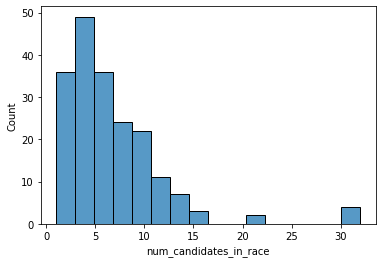

In [8]:
sns.histplot(df_received_endorsements["num_candidates_in_race"])

In [9]:
df_received_endorsements["num_candidates_in_race_binned"] = pd.cut(df_received_endorsements["num_candidates_in_race"], 3, retbins=True, labels=[1,2,3])[0]

<AxesSubplot:xlabel='num_candidates_in_race_binned', ylabel='Count'>

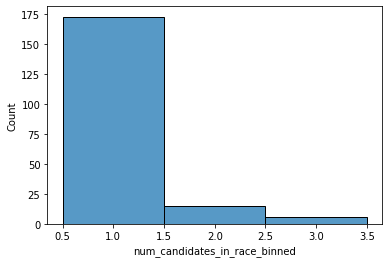

In [10]:
sns.histplot(df_received_endorsements["num_candidates_in_race_binned"])

<AxesSubplot:xlabel='district_lean', ylabel='Count'>

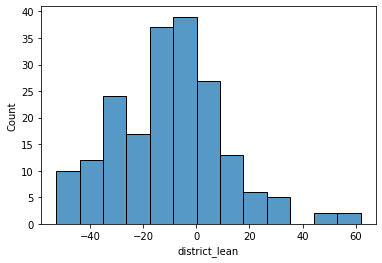

In [11]:
sns.histplot(df_received_endorsements["district_lean"])

In [12]:
df_received_endorsements["district_lean_binned"] = pd.cut(df_received_endorsements["num_candidates_in_race"], 3, retbins=True, labels=[1,2,3])[0]

<AxesSubplot:xlabel='district_lean_binned', ylabel='Count'>

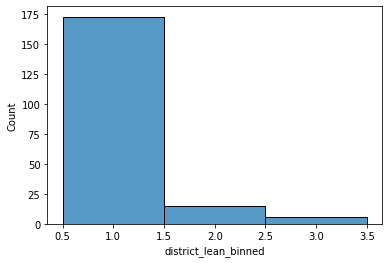

In [13]:
sns.histplot(df_received_endorsements["district_lean_binned"])

<AxesSubplot:xlabel='Total_Contribution', ylabel='Count'>

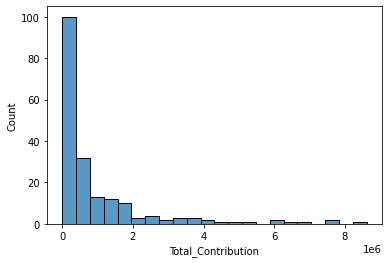

In [14]:
sns.histplot(df_received_endorsements["Total_Contribution"])

In [15]:
df_received_endorsements["Total_Contribution_binned"] = pd.cut(df_received_endorsements["Total_Contribution"], 3, retbins=True, labels=[1,2,3])[0]

<AxesSubplot:xlabel='Total_Contribution_binned', ylabel='Count'>

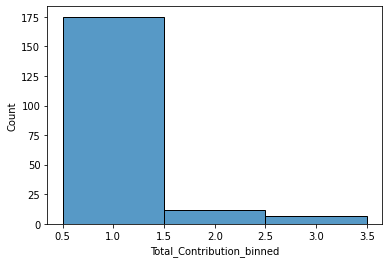

In [16]:
sns.histplot(df_received_endorsements["Total_Contribution_binned"])

In [17]:
df_received_endorsements

,Primary %,num_candidates_in_race,Challenger?(else_open),district_lean,Total_Contribution,num_candidates_in_race_binned,district_lean_binned,Total_Contribution_binned
4,37.800000,3,True,-5.633240,438887.91,1,1,1
5,43.400000,3,True,-5.633240,1391698.53,1,1,1
6,18.800000,3,True,-5.633240,368606.94,1,1,1
8,35.770000,14,False,-24.075340,2016009.27,2,2,1
25,35.570000,6,True,-0.921715,7762575.82,1,1,3
...,...,...,...,...,...,...,...,...
761,14.640000,3,True,-34.406710,0.00,1,1,1
762,37.430000,2,True,-29.266370,450704.43,1,1,1
763,62.570000,2,True,-29.266370,690529.49,1,1,1
767,24.639999,11,False,-43.583640,4000.00,1,1,1


In [18]:
df_didnt_receive_endorsements["num_candidates_in_race_binned"] = pd.cut(df_didnt_receive_endorsements["num_candidates_in_race"], 3, retbins=True, labels=[1,2,3])[0]
df_didnt_receive_endorsements["district_lean_binned"] = pd.cut(df_didnt_receive_endorsements["num_candidates_in_race"], 3, retbins=True, labels=[1,2,3])[0]
df_didnt_receive_endorsements["Total_Contribution_binned"] = pd.cut(df_didnt_receive_endorsements["Total_Contribution"], 3, retbins=True, labels=[1,2,3])[0]

In [72]:
sum_ate = 0
for i in range(1, 10):
    for j in range(1, 4):
        for k in range(1, 4):
            a = df_received_endorsements[
                (df_received_endorsements["num_candidates_in_race"] == i) & 
                (df_received_endorsements["district_lean_binned"] == j) & 
                (df_received_endorsements["Total_Contribution_binned"] == k)].fillna(1)
            b = df_didnt_receive_endorsements[
                (df_didnt_receive_endorsements["num_candidates_in_race"] == i) & 
                (df_didnt_receive_endorsements["district_lean_binned"] == j) & 
                (df_didnt_receive_endorsements["Total_Contribution_binned"] == k)].fillna(1)
            if a.shape[0] != 0 or b.shape[0] != 0:
                print("#cands:", i, "dis_lean:", j, "tot_contr:", k)
                print("a #:", a.shape[0], "b #:", b.shape[0])
                print(np.mean(a["Primary %"]) - np.mean(b["Primary %"]))
            

#cands: 1 dis_lean: 1 tot_contr: 1
a #: 11 b #: 55
0.0
#cands: 1 dis_lean: 1 tot_contr: 2
a #: 4 b #: 0
nan
#cands: 2 dis_lean: 1 tot_contr: 1
a #: 17 b #: 60
11.467117243137253
#cands: 2 dis_lean: 1 tot_contr: 2
a #: 2 b #: 4
1.8950007500000083
#cands: 2 dis_lean: 1 tot_contr: 3
a #: 2 b #: 0
nan
#cands: 3 dis_lean: 1 tot_contr: 1
a #: 26 b #: 74
2.5112476118503224
#cands: 3 dis_lean: 1 tot_contr: 2
a #: 0 b #: 4
nan
#cands: 3 dis_lean: 1 tot_contr: 3
a #: 0 b #: 1
nan
#cands: 4 dis_lean: 1 tot_contr: 1
a #: 22 b #: 52
-2.8283217718531404
#cands: 4 dis_lean: 1 tot_contr: 2
a #: 1 b #: 2
-56.9500005
#cands: 5 dis_lean: 1 tot_contr: 1
a #: 16 b #: 32
12.720312571874993
#cands: 5 dis_lean: 1 tot_contr: 2
a #: 0 b #: 2
nan
#cands: 6 dis_lean: 1 tot_contr: 1
a #: 17 b #: 51
9.639411815686277
#cands: 6 dis_lean: 1 tot_contr: 2
a #: 1 b #: 1
25.350003
#cands: 6 dis_lean: 1 tot_contr: 3
a #: 2 b #: 1
-9.930000499999991
#cands: 7 dis_lean: 1 tot_contr: 1
a #: 13 b #: 36
1.3116239942307697
#can